In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\lngsm\\Documents\\math373\\finalproject\\training.zip")

In [3]:
df.shape

(7049, 31)

In [4]:
#Functions to plot and show these images
def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces(nrows=5, ncols=5):
    """Randomly displays some faces from the training data."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), cmap='gray')
        ax.axis('off')

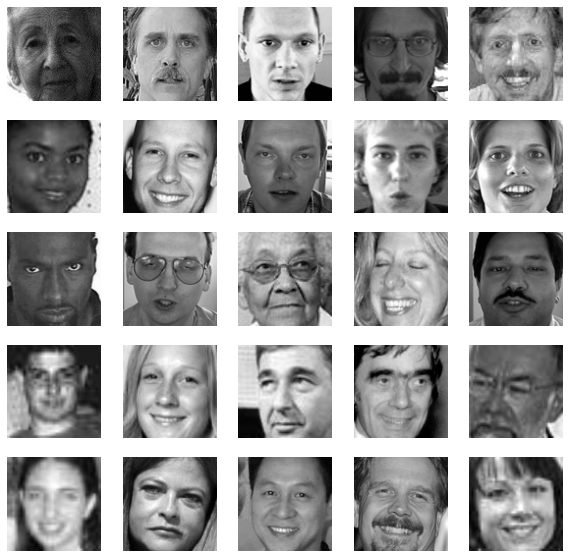

In [5]:
plot_faces()

In [6]:
keypoint_cols = list(df.columns)[:-1]

In [7]:
xy = df.iloc[0][keypoint_cols].values.reshape((15, 2))
xy

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188000005, 39.647422556399995],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.38899248119999],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

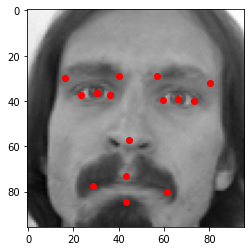

In [8]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
plt.imshow(string2image(df.iloc[0]['Image']), cmap='gray')

In [9]:
#Function to plot faces with keypoints on them
def plot_faces_with_keypoints(nrows=5, ncols=5):
    """Randomly displays some faces from the training data with their keypoints."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    keypoint_cols = list(df.columns)[:-1]
    keypoints = df.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'ro')
        ax.axis('off')

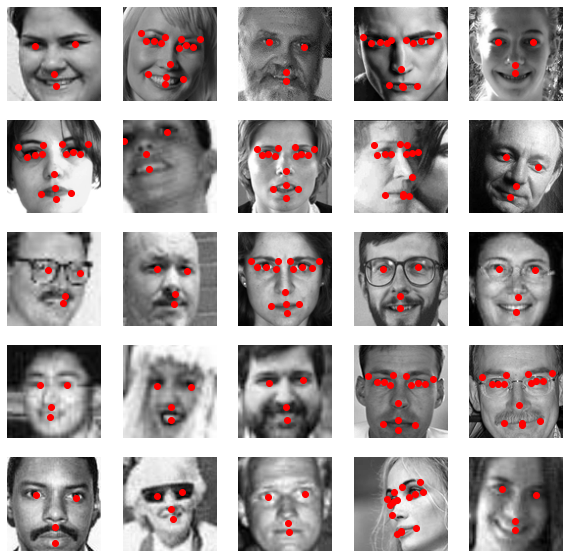

In [10]:
plot_faces_with_keypoints()

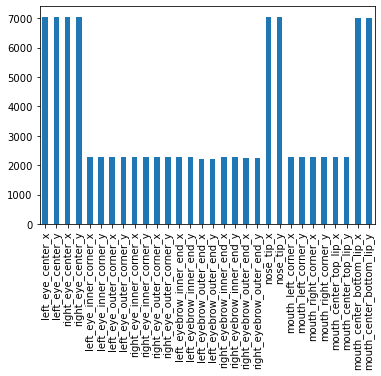

In [11]:
df.describe().loc['count'].plot.bar()

In [12]:
fully_annotated = df.dropna()
fully_annotated.shape

(2140, 31)

In [13]:
X = np.stack([string2image(string) for string in fully_annotated['Image']]).astype(np.float)[:, :, :, np.newaxis]
y = np.vstack(fully_annotated[fully_annotated.columns[:-1]].values)

In [14]:
X.shape, X.dtype
y.shape, y.dtype

((2140, 30), dtype('float64'))

In [15]:
X_train = X / 255.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

In [17]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D, Convolution2D

Using TensorFlow backend.
C:\Users\lngsm\1Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lngsm\1Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lngsm\1Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lngsm\1Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [18]:
#First model: I wanted to try something simple first, without any convolution
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(96*96,)))
model.add(Activation('relu'))
model.add(Dense(30))



Instructions for updating:
Colocations handled automatically by placer.


In [19]:
from keras import optimizers
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Conv2D,MaxPool2D, ZeroPadding2D
from keras.models import Sequential, Model



sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 200
history = model.fit(X_train.reshape(y_train.shape[0], -1), y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)




Instructions for updating:
Use tf.cast instead.
Train on 1712 samples, validate on 428 samples
Epoch 1/200
1712/1712 [==============================] - 1s 679us/step - loss: 0.0615 - accuracy: 0.1600 - val_loss: 0.0700 - val_accuracy: 0.0444
Epoch 2/200
1712/1712 [==============================] - 1s 482us/step - loss: 0.0348 - accuracy: 0.3289 - val_loss: 0.0681 - val_accuracy: 0.0397
Epoch 3/200
1712/1712 [==============================] - 1s 487us/step - loss: 0.0327 - accuracy: 0.3610 - val_loss: 0.0669 - val_accuracy: 0.0467
Epoch 4/200
1712/1712 [==============================] - 1s 479us/step - loss: 0.0314 - accuracy: 0.3727 - val_loss: 0.0662 - val_accuracy: 0.0421
Epoch 5/200
1712/1712 [==============================] - 1s 594us/step - loss: 0.0303 - accuracy: 0.3703 - val_loss: 0.0647 - val_accuracy: 0.0444
Epoch 6/200
1712/1712 [==============================] - 1s 617us/step - loss: 0.0292 - accuracy: 0.3744 - val_loss: 0.0639 - val_accuracy: 0.0491
Epoch 7/200
1712/1712 [

1712/1712 [==============================] - 1s 447us/step - loss: 0.0104 - accuracy: 0.5263 - val_loss: 0.0489 - val_accuracy: 0.1519
Epoch 110/200
1712/1712 [==============================] - 1s 452us/step - loss: 0.0106 - accuracy: 0.5134 - val_loss: 0.0497 - val_accuracy: 0.1706
Epoch 111/200
1712/1712 [==============================] - 1s 483us/step - loss: 0.0106 - accuracy: 0.5298 - val_loss: 0.0493 - val_accuracy: 0.1589
Epoch 112/200
1712/1712 [==============================] - 1s 563us/step - loss: 0.0106 - accuracy: 0.5216 - val_loss: 0.0489 - val_accuracy: 0.1636
Epoch 113/200
1712/1712 [==============================] - 1s 446us/step - loss: 0.0104 - accuracy: 0.5333 - val_loss: 0.0516 - val_accuracy: 0.1589
Epoch 114/200
1712/1712 [==============================] - 1s 526us/step - loss: 0.0106 - accuracy: 0.5304 - val_loss: 0.0484 - val_accuracy: 0.1589
Epoch 115/200
1712/1712 [==============================] - 1s 496us/step - loss: 0.0102 - accuracy: 0.5181 - val_loss: 0

1712/1712 [==============================] - 1s 490us/step - loss: 0.0091 - accuracy: 0.5199 - val_loss: 0.0485 - val_accuracy: 0.1449
Epoch 165/200
1712/1712 [==============================] - 1s 457us/step - loss: 0.0092 - accuracy: 0.5374 - val_loss: 0.0480 - val_accuracy: 0.1612
Epoch 166/200
1712/1712 [==============================] - 1s 450us/step - loss: 0.0090 - accuracy: 0.5292 - val_loss: 0.0483 - val_accuracy: 0.1425
Epoch 167/200
1712/1712 [==============================] - 1s 540us/step - loss: 0.0090 - accuracy: 0.5286 - val_loss: 0.0483 - val_accuracy: 0.1822
Epoch 168/200
1712/1712 [==============================] - 1s 687us/step - loss: 0.0092 - accuracy: 0.5339 - val_loss: 0.0491 - val_accuracy: 0.1379
Epoch 169/200
1712/1712 [==============================] - 1s 680us/step - loss: 0.0091 - accuracy: 0.5181 - val_loss: 0.0508 - val_accuracy: 0.1425
Epoch 170/200
1712/1712 [==============================] - 1s 653us/step - loss: 0.0090 - accuracy: 0.5304 - val_loss: 0

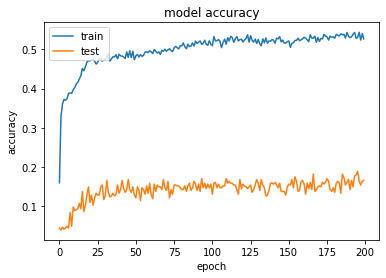

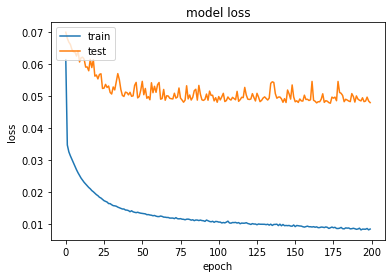

In [20]:
#Plot of accuracy and loss for the first, simple model
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
img = X_train[0, :, :, :].reshape(1, -1)
predictions = model.predict(img)
img

array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.2745098 , 0.29411765,
        0.35294118]])

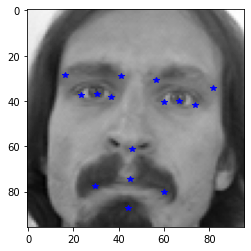

In [22]:
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
plt.imshow(X_train[0, :, :, 0], cmap='gray')
plt.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'b*')

In [23]:
def plot_faces_with_keypoints_and_predictions(model, nrows=5, ncols=5, model_input='flat'):
    """Plots sampled faces with their truth and predictions."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False)
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'bo')
        ax.axis('off')

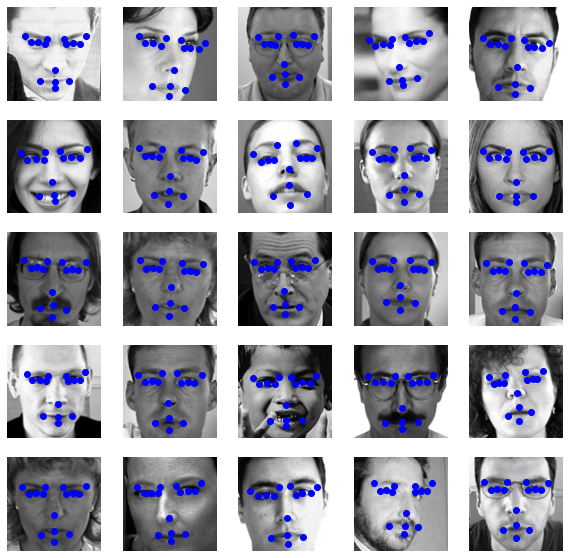

In [24]:
plot_faces_with_keypoints_and_predictions(model)

In [25]:
#Second model: this is my model with using 8 layers--not including the input layer--as my convolutional NN.

from keras.layers import Dropout, Flatten

model = Sequential()
# input layer
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(36, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 3
model.add(Conv2D(48, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
# layer 6
model.add(Dense(500, activation="relu"))
# layer 7
model.add(Dense(90, activation="relu"))
# layer 8
model.add(Dense(30))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model.add(Dropout(0.2))
#model.add(Dense(30))

In [26]:
import torchvision

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
#model = torchvision.models.resnet18(pretrained=True)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 50
history = model.fit(X_train, y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 57s 34ms/step - loss: 0.0389 - accuracy: 0.2815 - val_loss: 0.0685 - val_accuracy: 0.0327
Epoch 2/50
1712/1712 [==============================] - 61s 36ms/step - loss: 0.0353 - accuracy: 0.3353 - val_loss: 0.0698 - val_accuracy: 0.0327
Epoch 3/50
1712/1712 [==============================] - 55s 32ms/step - loss: 0.0344 - accuracy: 0.3411 - val_loss: 0.0700 - val_accuracy: 0.0491
Epoch 4/50
1712/1712 [==============================] - 54s 31ms/step - loss: 0.0311 - accuracy: 0.3814 - val_loss: 0.0647 - val_accuracy: 0.0607
Epoch 5/50
1712/1712 [==============================] - 54s 31ms/step - loss: 0.0258 - accuracy: 0.4124 - val_loss: 0.0541 - val_accuracy: 0.1402
Epoch 6/50
1712/1712 [==============================] - 56s 33ms/step - loss: 0.0222 - accuracy: 0.4258 - val_loss: 0.0488 - val_accuracy: 0.1355
Epoch 7/50
1712/1712 [==============================] - 55s 32ms/step - loss:

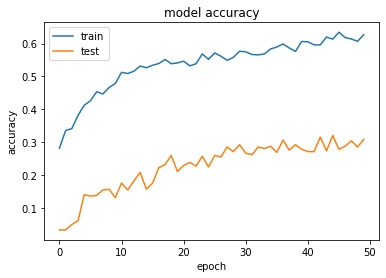

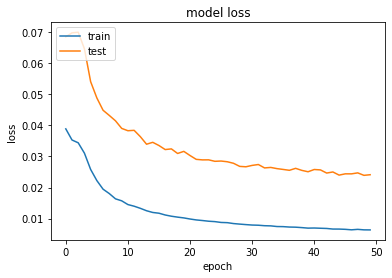

In [27]:
#Plot of my Convolutional NN accuracy and loss
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

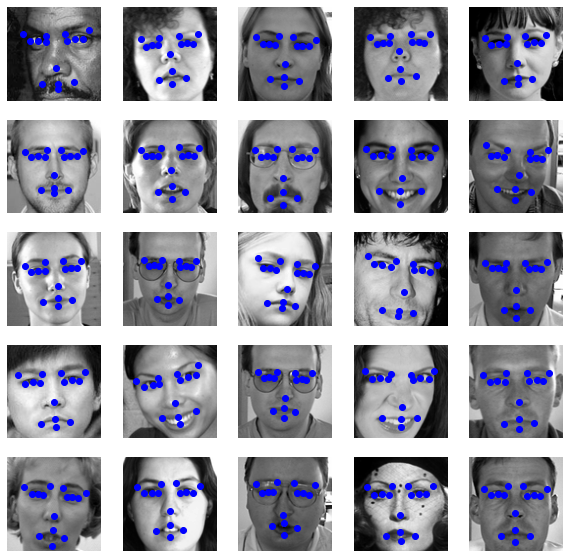

In [28]:
plot_faces_with_keypoints_and_predictions(model, model_input='2d')

In [29]:
from keras.models import Model
from keras.applications import ResNet50

height = 100 #dimensions of image
width = 100
channel = 3 #RGB

# Create pre-trained ResNet50 without top layer
model_resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(height, width, channel))

C:\Users\lngsm\1Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [30]:
#Model 3: this model is the same as model 2-- a convolutional NN, but using a pretrained model of ResNet.
from keras.layers import Dropout, Flatten

model = Sequential()
# input layer
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(36, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 3
model.add(Conv2D(48, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
# layer 6
model.add(Dense(500, activation="relu"))
# layer 7
model.add(Dense(90, activation="relu"))
# layer 8
model.add(Dense(30))

In [31]:
import torchvision

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
#model = torchvision.models.resnet18(pretrained=True)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 50
history = model.fit(X_train, y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 55s 32ms/step - loss: 0.0383 - accuracy: 0.3020 - val_loss: 0.0717 - val_accuracy: 0.0327
Epoch 2/50
1712/1712 [==============================] - 51s 30ms/step - loss: 0.0350 - accuracy: 0.3294 - val_loss: 0.0711 - val_accuracy: 0.0327
Epoch 3/50
1712/1712 [==============================] - 51s 30ms/step - loss: 0.0334 - accuracy: 0.3230 - val_loss: 0.0748 - val_accuracy: 0.0584
Epoch 4/50
1712/1712 [==============================] - 51s 30ms/step - loss: 0.0297 - accuracy: 0.3703 - val_loss: 0.0662 - val_accuracy: 0.0304
Epoch 5/50
1712/1712 [==============================] - 52s 30ms/step - loss: 0.0245 - accuracy: 0.4363 - val_loss: 0.0555 - val_accuracy: 0.1028
Epoch 6/50
1712/1712 [==============================] - 52s 30ms/step - loss: 0.0208 - accuracy: 0.4282 - val_loss: 0.0493 - val_accuracy: 0.1238
Epoch 7/50
1712/1712 [==============================] - 51s 30ms/step - loss:

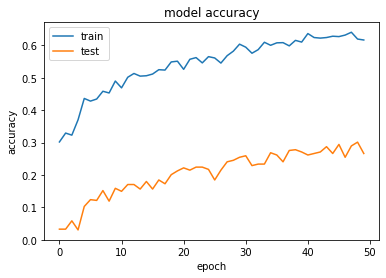

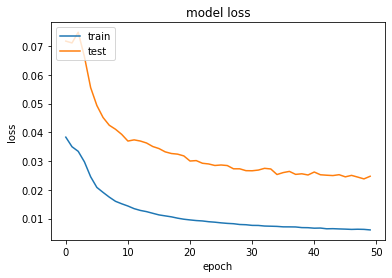

In [32]:
#Plot of model 3's accuracy and loss
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Shape of altered_brightness_train_images: (4280, 96, 96, 1)
Shape of altered_brightness_train_keypoints: (4280, 30)


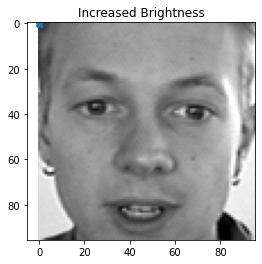

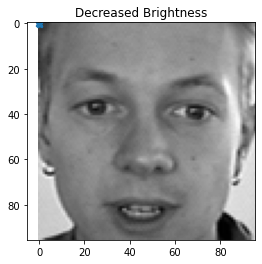

In [33]:
##TRYING DATA AUGMENTATION with increasing the brightness of the image!
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)
def alter_brightness(images, keypoints):
    altered_brightness_images = []
    inc_brightness_images = np.clip(images*1.2, 0.0, 1.0)    # Increased brightness by a factor of 1.2 & clip any values outside the range of [-1,1]
    dec_brightness_images = np.clip(images*0.6, 0.0, 1.0)    # Decreased brightness by a factor of 0.6 & clip any values outside the range of [-1,1]
    altered_brightness_images.extend(inc_brightness_images)
    altered_brightness_images.extend(dec_brightness_images)
    return altered_brightness_images, np.concatenate((keypoints, keypoints))


altered_brightness_train_images, altered_brightness_train_keypoints = alter_brightness(X_train, y_train)
print("Shape of altered_brightness_train_images:", np.shape(altered_brightness_train_images))
print("Shape of altered_brightness_train_keypoints:", np.shape(altered_brightness_train_keypoints))
train_images = np.concatenate((X_train, altered_brightness_train_images))
train_keypoints = np.concatenate((y_train, altered_brightness_train_keypoints))
fig, axis = plt.subplots()
#plt.plot(xy[:, 0], xy[:, 1], 'ro')
#plt.imshow(string2image(df.iloc[0]['Image']), cmap='gray')
plot_sample(altered_brightness_train_images[19], altered_brightness_train_keypoints[19], axis, "Increased Brightness") 
fig, axis = plt.subplots()
plot_sample(altered_brightness_train_images[len(altered_brightness_train_images)//2+19], altered_brightness_train_keypoints[len(altered_brightness_train_images)//2+19], axis, "Decreased Brightness") 

In [34]:
#Model 4: a convollutional NN using our data with increased brightness (with data augmentation)
from keras.layers import Dropout, Flatten

model = Sequential()
# input layer
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(36, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 3
model.add(Conv2D(48, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
# layer 6
model.add(Dense(500, activation="relu"))
# layer 7
model.add(Dense(90, activation="relu"))
# layer 8
model.add(Dense(30))

In [35]:

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
#model = torchvision.models.resnet18(pretrained=True)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 50
history = model.fit(train_images, train_keypoints, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)
#es = callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1, mode='auto', baseline=None, restore_best_weights=True)#

#rlp = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-15, mode='min', verbose=1)

#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'acc'])

#history = model.fit(train_images, train_keypoints, epochs=50, batch_size=20, validation_split=0.2)

Train on 5136 samples, validate on 1284 samples
Epoch 1/50
5136/5136 [==============================] - 151s 29ms/step - loss: 0.0410 - accuracy: 0.2796 - val_loss: 0.0506 - val_accuracy: 0.1215
Epoch 2/50
5136/5136 [==============================] - 153s 30ms/step - loss: 0.0308 - accuracy: 0.3577 - val_loss: 0.0329 - val_accuracy: 0.2788
Epoch 3/50
5136/5136 [==============================] - 151s 29ms/step - loss: 0.0226 - accuracy: 0.4124 - val_loss: 0.0290 - val_accuracy: 0.2913
Epoch 4/50
5136/5136 [==============================] - 151s 29ms/step - loss: 0.0188 - accuracy: 0.4317 - val_loss: 0.0241 - val_accuracy: 0.3170
Epoch 5/50
5136/5136 [==============================] - 152s 30ms/step - loss: 0.0169 - accuracy: 0.4420 - val_loss: 0.0227 - val_accuracy: 0.3217
Epoch 6/50
5136/5136 [==============================] - 149s 29ms/step - loss: 0.0151 - accuracy: 0.4585 - val_loss: 0.0199 - val_accuracy: 0.3629
Epoch 7/50
5136/5136 [==============================] - 148s 29ms/step

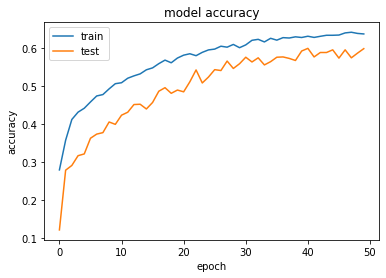

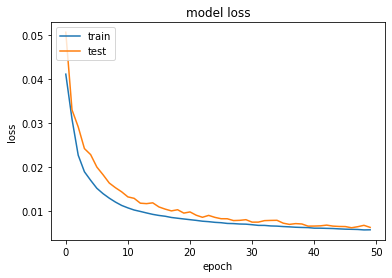

In [36]:
#Plot for model 4's accuracy and loss

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#Model 5: a convolutional NN with data augmentation of increased brightness, using a pretrained model of ResNet.
from keras.models import Model
from keras.applications import ResNet50

height = 100 #dimensions of image
width = 100
channel = 3 #RGB

# Create pre-trained ResNet50 without top layer
model_resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(height, width, channel))

from keras.layers import Dropout, Flatten

model = Sequential()
# input layer
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(36, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 3
model.add(Conv2D(48, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
# layer 6
model.add(Dense(500, activation="relu"))
# layer 7
model.add(Dense(90, activation="relu"))
# layer 8
model.add(Dense(30))

In [41]:
import torchvision

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
#model = torchvision.models.resnet18(pretrained=True)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 50
history = model.fit(train_images, train_keypoints, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 5136 samples, validate on 1284 samples
Epoch 1/50
5136/5136 [==============================] - 145s 28ms/step - loss: 0.0401 - accuracy: 0.2702 - val_loss: 0.0512 - val_accuracy: 0.2142
Epoch 2/50
5136/5136 [==============================] - 138s 27ms/step - loss: 0.0275 - accuracy: 0.3672 - val_loss: 0.0305 - val_accuracy: 0.3030
Epoch 3/50
5136/5136 [==============================] - 138s 27ms/step - loss: 0.0201 - accuracy: 0.4208 - val_loss: 0.0240 - val_accuracy: 0.3232
Epoch 4/50
5136/5136 [==============================] - 139s 27ms/step - loss: 0.0164 - accuracy: 0.4476 - val_loss: 0.0210 - val_accuracy: 0.3294
Epoch 5/50
5136/5136 [==============================] - 512s 100ms/step - loss: 0.0138 - accuracy: 0.4930 - val_loss: 0.0160 - val_accuracy: 0.3816
Epoch 6/50
5136/5136 [==============================] - 624s 122ms/step - loss: 0.0124 - accuracy: 0.5064 - val_loss: 0.0148 - val_accuracy: 0.4276
Epoch 7/50
5136/5136 [==============================] - 145s 28ms/st

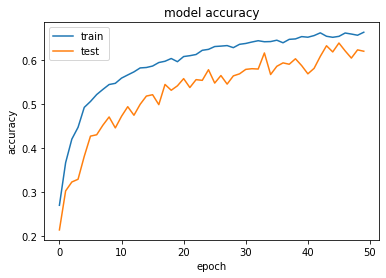

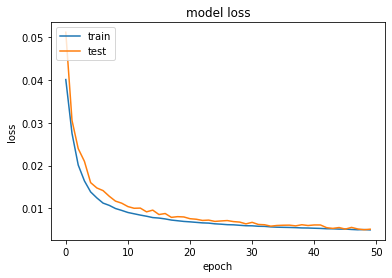

In [42]:
#Plot for model 5's accuracy and loss
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()